# Visualizations for ABS
Below is the code used to create the visualizations from the [2019 Annual Business Survey Data](https://www.census.gov/data/developers/data-sets/abs.2019.html)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load the DataFrames
business_owner_characteristics = pd.read_csv(r'Data\business_owner_characteristics.csv')

business_characteristics = pd.read_csv(r'Data\business_characteristics.csv')

company_summary = pd.read_csv(r'Data\company_summary.csv')

tech_characteristics = pd.read_csv(r'Data\tech_characteristics.csv')

## Overall Owner Distributions Across all Industry Sectors
Let's look at owner demographics for businesses across all industry sectors

In [3]:
business_owner_characteristics = business_owner_characteristics[business_owner_characteristics['IndustrySector'] == 'Total for all sectors']

If we wanted to look at the breakdown between hispanic and non-hispanic business owners, we could drill down to the data where all other categories includes aggregates except for the ethnicity

In [4]:
business_owner_ethnicity = business_owner_characteristics[(business_owner_characteristics['OwnerSex'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerRace'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['VeteranStatus'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerResp'] == 'Total reporting')
                              & (business_owner_characteristics['OwnerEthnicity'] != 'All owners of respondent firms')]

Since there are multiple questions (as seen by the QuestionDescription), we can aggregate the like values (Non/Hispanic) and get the mean to account for any variations in the differences between the number of responses for each question.

In [5]:
non_total_owner_ethnicity = business_owner_ethnicity.groupby('OwnerEthnicity')['NumberOfOwners'].mean()

In [6]:
non_total_owner_ethnicity.index

Index(['Hispanic', 'Non-Hispanic'], dtype='object', name='OwnerEthnicity')

Plotting the data

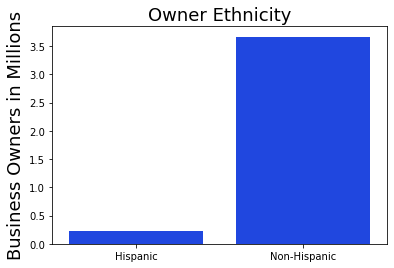

In [7]:
ax = sns.barplot(x=non_total_owner_ethnicity.index, y=(non_total_owner_ethnicity.values)/1000000, color='#0034FF')
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title('Owner Ethnicity', size=18)
ax.set_xlabel('')
ax.set_ylabel('Business Owners in Millions', size=18);

Let's do the same but now look at the breakdown by race

In [8]:
#unique values for race
business_owner_race = business_owner_characteristics[(business_owner_characteristics['OwnerSex'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerEthnicity'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['VeteranStatus'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerResp'] == 'Total reporting')
                              & (business_owner_characteristics['OwnerRace'] != 'All owners of respondent firms') & (business_owner_characteristics['OwnerRace'] != 'Minority') & (business_owner_characteristics['OwnerRace'] != 'Nonminority')]

Again, we want to account for any variations in the number of responses for different questions

In [9]:
non_total_owner_race = business_owner_race.groupby('OwnerRace')['NumberOfOwners'].mean()

Now plotting the data

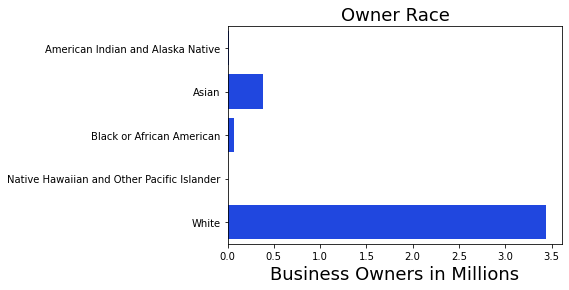

In [10]:
ax = sns.barplot(x=(non_total_owner_race.values)/1000000, y=non_total_owner_race.index, color='#0034FF', orient='h')
ax.set_yticklabels(ax.get_yticklabels())
ax.set_title('Owner Race', size=18)
ax.set_ylabel('')
ax.set_xlabel('Business Owners in Millions', size=18);

Let's look at how the breakdown compares for business owners by sex

In [11]:
#Unique values for sex
business_owner_sex = business_owner_characteristics[(business_owner_characteristics['OwnerSex'] != 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerRace'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['VeteranStatus'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerResp'] == 'Total reporting')
                              & (business_owner_characteristics['OwnerEthnicity'] == 'All owners of respondent firms')]

In [12]:
non_total_owner_sex = business_owner_sex.groupby('OwnerSex')['NumberOfOwners'].mean()

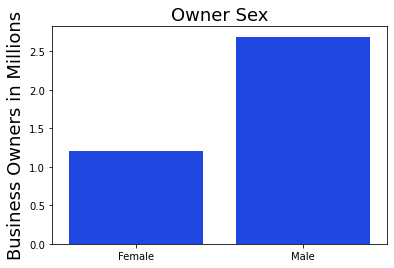

In [13]:
ax = sns.barplot(x=non_total_owner_sex.index, y=(non_total_owner_sex.values)/1000000, color='#0034FF')
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title('Owner Sex', size=18)
ax.set_xlabel('')
ax.set_ylabel('Business Owners in Millions', size=18);

For veteran status we could do the following:

In [14]:
#Owner Veteran Status
business_owner_vetstatus = business_owner_characteristics[(business_owner_characteristics['OwnerSex'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerRace'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['VeteranStatus'] != 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerResp'] == 'Total reporting')
                              & (business_owner_characteristics['OwnerEthnicity'] == 'All owners of respondent firms')]

In [15]:
owner_vet_status = business_owner_vetstatus.groupby('VeteranStatus')['NumberOfOwners'].mean()

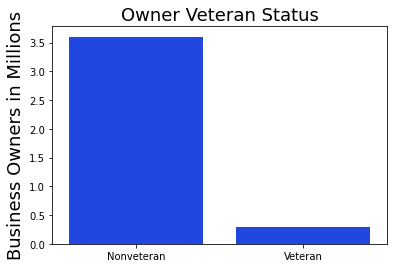

In [16]:
ax = sns.barplot(x=owner_vet_status.index, y=(owner_vet_status.values)/1000000, color='#0034FF')
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title('Owner Veteran Status', size=18)
ax.set_xlabel('')
ax.set_ylabel('Business Owners in Millions', size=18);

### Race of Firm Owners in the Biggest Industry Sectors
Start by filtering out all rows except for the "Total" aggregate rows in the `Sex`, `Ethnicity`, `Race`, `VeteranStatus`, and `SizeOfFirm` columns on the `company_summery` dataset.

In [17]:
newDF = company_summary[(company_summary['Sex'] == 'Total')
    &(company_summary['Ethnicity'] == 'Total')
    &(company_summary['Race'] == 'Total')
    &(company_summary['VeteranStatus'] == 'Total')
    &(company_summary['SizeOfFirm'] == 'All firms')]

Sort the `NumberOfRespondents` column from biggest to smallest.

In [18]:
newDF.sort_values(by='NumberOfRespondents',ascending=False,inplace=True)

C:\Users\Christian\AppData\Local\Temp\ipykernel_13604\1385040093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDF.sort_values(by='NumberOfRespondents',ascending=False,inplace=True)


Pull the top 10 Industry Sectors by number of respondents (disregard the 'Total for all sectors' aggregate row), and list them for reference.

In [19]:
newDF.head(11)
# 1. 'Professional, scientific, and technical services' ------------------------- 817,532
# 2. 'Construction' ------------------------------------------------------------- 710,826
# 3. 'Health care and social assistance' ---------------------------------------- 645,357
# 4. 'Retail trade' ------------------------------------------------------------- 639,706
# 5. 'Accommodation and food services' ------------------------------------------ 532,009
# 6. 'Other services (except public administration)' ---------------------------- 395,133
# 7. 'Administrative and support and waste management and remediation services' - 347,382
# 8. 'Real estate and rental and leasing' --------------------------------------- 318,204
# 9. 'Wholesale trade' ---------------------------------------------------------- 297,105
#10. 'Manufacturing' ------------------------------------------------------------ 246,442

,Unnamed: 0,Region,IndustrySector,Sex,Ethnicity,Race,VeteranStatus,SizeOfFirm,NumberOfRespondents,TotalRevenueOfFirmsInCategory,NumberOfEmployeesInCategory,AnnualPayroll
15,15,United States,Total for all sectors,Total,Total,Total,Total,All firms,5722142,38405539368,128196406,6937240308
9293,10699,United States,"Professional, scientific, and technical services",Total,Total,Total,Total,All firms,817532,0,9356647,816366134
2462,2876,United States,Construction,Total,Total,Total,Total,All firms,710826,0,6754898,424172015
12821,14778,United States,Health care and social assistance,Total,Total,Total,Total,All firms,645357,0,19123446,936790920
5319,6144,United States,Retail trade,Total,Total,Total,Total,All firms,639706,0,15875876,462509026
14421,16616,United States,Accommodation and food services,Total,Total,Total,Total,All firms,532009,0,14275081,286431631
15296,17593,United States,Other services (except public administration),Total,Total,Total,Total,All firms,395133,0,2774104,93678291
10635,12201,United States,Administrative and support and waste managemen...,Total,Total,Total,Total,All firms,347382,0,12694998,509961571
9234,10636,United States,Real estate and rental and leasing,Total,Total,Total,Total,All firms,318204,0,2111832,116333278
4096,4754,United States,Wholesale trade,Total,Total,Total,Total,All firms,297105,0,6109303,454494182


Pull necessary columns from the `company_summary` dataset.

In [20]:
cSum = company_summary[['IndustrySector','Sex','Ethnicity','Race','VeteranStatus','SizeOfFirm','NumberOfRespondents']]

Filter out all rows except for the top 5 industry sectors

In [21]:
cSum1 = cSum[(cSum['IndustrySector'] == 'Professional, scientific, and technical services')
    |(cSum['IndustrySector'] == 'Construction')
    |(cSum['IndustrySector'] == 'Health care and social assistance')
    |(cSum['IndustrySector'] == 'Retail trade')
    |(cSum['IndustrySector'] == 'Accommodation and food services')]

Get only aggregate 'Total' rows for five race groups (White, Black or African-American, Asian, American Indian and Alaskan Native, and Native Hawaiian and other Pacific Islander)

In [22]:
summary = cSum1[(cSum1['SizeOfFirm'] == 'All firms')
    &(cSum1['Sex'] == 'Total')
    &(cSum1['Ethnicity'] == 'Total')
    &(cSum1['Race'] != 'Total')
    &(cSum1['Race'] != 'Minority')
    &(cSum1['Race'] != 'Equally minority/nonminority')
    &(cSum1['Race'] != 'Nonminority')
    &(cSum1['VeteranStatus'] == 'Total')]

Sort by `IndustrySector`

In [23]:
summary.sort_values(by='IndustrySector',inplace=True)

C:\Users\Christian\AppData\Local\Temp\ipykernel_13604\529865567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary.sort_values(by='IndustrySector',inplace=True)


Change `NumberOfRespondents` column dataype to integer

In [24]:
graph = summary[['IndustrySector','Race', 'NumberOfRespondents']]

Create "percent of total" columns for each race group by taking the number of respondents in each industry sector and dividing by the sum of all respondents in the top 5 industry sectors for each race group.

In [25]:
gWhite = graph[graph['Race'] == 'White']
total = gWhite['NumberOfRespondents'].sum()
gWhite['Perc_of_Total'] = (gWhite['NumberOfRespondents']/total)*100

gBlack = graph[graph['Race'] == 'Black or African American']
total = gBlack['NumberOfRespondents'].sum()
gBlack['Perc_of_Total'] = (gBlack['NumberOfRespondents']/total)*100

gAsian = graph[graph['Race'] == 'Asian']
total = gAsian['NumberOfRespondents'].sum()
gAsian['Perc_of_Total'] = (gAsian['NumberOfRespondents']/total)*100

gNative = graph[graph['Race'] == 'American Indian and Alaska Native']
total = gNative['NumberOfRespondents'].sum()
gNative['Perc_of_Total'] = (gNative['NumberOfRespondents']/total)*100

gPacific = graph[graph['Race'] == 'Native Hawaiian and Other Pacific Islander']
total = gPacific['NumberOfRespondents'].sum()
gPacific['Perc_of_Total'] = (gPacific['NumberOfRespondents']/total)*100

C:\Users\Christian\AppData\Local\Temp\ipykernel_13604\2253991817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gWhite['Perc_of_Total'] = (gWhite['NumberOfRespondents']/total)*100
C:\Users\Christian\AppData\Local\Temp\ipykernel_13604\2253991817.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gBlack['Perc_of_Total'] = (gBlack['NumberOfRespondents']/total)*100
C:\Users\Christian\AppData\Local\Temp\ipykernel_13604\2253991817.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

Create a chart showing the break down of each race groups percent of total firms owned in the top 5 industry sectors

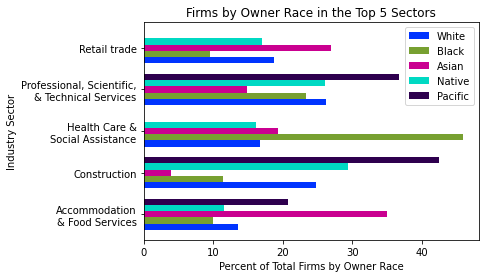

In [26]:
labels = ['Accommodation\n& Food Services', 'Construction', 'Health Care &\nSocial Assistance', 'Professional, Scientific,\n& Technical Services', 'Retail trade']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots()
rects1 = ax.barh(x - width*2, gWhite['Perc_of_Total'], width, label='White',color='#0034FF')
rects2 = ax.barh(x - width, gBlack['Perc_of_Total'], width, label='Black',color='#77A031')
rects3 = ax.barh(x, gAsian['Perc_of_Total'], width, label='Asian',color='#CA0090')
rects4 = ax.barh(x + width, gNative['Perc_of_Total'], width, label='Native',color='#00D9C3')
rects5 = ax.barh(x + width*2, gPacific['Perc_of_Total'], width, label='Pacific',color='#2E004E')

ax.set_ylabel('Industry Sector')
ax.set_xlabel('Percent of Total Firms by Owner Race')
ax.set_title('Firms by Owner Race in the Top 5 Sectors')
ax.set_yticks(x, labels)
ax.legend()

plt.show()

Repeat the same steps from this previous visualization, but include rows for the top 10 industry sectors

In [27]:
c_Sum = company_summary[['IndustrySector','Sex','Ethnicity','Race','VeteranStatus','SizeOfFirm','NumberOfRespondents']]

c_Sum1 = c_Sum[(c_Sum['IndustrySector'] == 'Professional, scientific, and technical services')
    |(c_Sum['IndustrySector'] == 'Construction')
    |(c_Sum['IndustrySector'] == 'Health care and social assistance')
    |(c_Sum['IndustrySector'] == 'Retail trade')
    |(c_Sum['IndustrySector'] == 'Accommodation and food services')
    |(c_Sum['IndustrySector'] == 'Other services (except public administration)')
    |(c_Sum['IndustrySector'] == 'Administrative and support and waste management and remediation services')
    |(c_Sum['IndustrySector'] == 'Real estate and rental and leasing')
    |(c_Sum['IndustrySector'] == 'Wholesale trade')
    |(c_Sum['IndustrySector'] == 'Manufacturing')]

summary = c_Sum1[(c_Sum1['SizeOfFirm'] == 'All firms')
    &(c_Sum1['Sex'] == 'Total')
    &(c_Sum1['Ethnicity'] == 'Total')
    &(c_Sum1['Race'] != 'Total')
    &(c_Sum1['Race'] != 'Minority')
    &(c_Sum1['Race'] != 'Equally minority/nonminority')
    &(c_Sum1['Race'] != 'Nonminority')
    &(c_Sum1['VeteranStatus'] == 'Total')]

In [28]:
graph = summary[['IndustrySector','Race', 'NumberOfRespondents']]

In [29]:
gWhite = graph[graph['Race'] == 'White']
total = gWhite['NumberOfRespondents'].sum()
gWhite['Perc_of_Total'] = (gWhite['NumberOfRespondents']/total)*100
gWhite.sort_values(by='Perc_of_Total',inplace=True)

gBlack = graph[graph['Race'] == 'Black or African American']
total = gBlack['NumberOfRespondents'].sum()
gBlack['Perc_of_Total'] = (gBlack['NumberOfRespondents']/total)*100
gBlack.sort_values(by='Perc_of_Total',inplace=True)

gAsian = graph[graph['Race'] == 'Asian']
total = gAsian['NumberOfRespondents'].sum()
gAsian['Perc_of_Total'] = (gAsian['NumberOfRespondents']/total)*100
gAsian.sort_values(by='Perc_of_Total',inplace=True)

gNative = graph[graph['Race'] == 'American Indian and Alaska Native']
total = gNative['NumberOfRespondents'].sum()
gNative['Perc_of_Total'] = (gNative['NumberOfRespondents']/total)*100
gNative.sort_values(by='Perc_of_Total',inplace=True)

gPacific = graph[graph['Race'] == 'Native Hawaiian and Other Pacific Islander']
total = gPacific['NumberOfRespondents'].sum()
gPacific['Perc_of_Total'] = (gPacific['NumberOfRespondents']/total)*100
gPacific.sort_values(by='Perc_of_Total',inplace=True)

C:\Users\Christian\AppData\Local\Temp\ipykernel_13604\100773543.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gWhite['Perc_of_Total'] = (gWhite['NumberOfRespondents']/total)*100
C:\Users\Christian\AppData\Local\Temp\ipykernel_13604\100773543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gWhite.sort_values(by='Perc_of_Total',inplace=True)
C:\Users\Christian\AppData\Local\Temp\ipykernel_13604\100773543.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

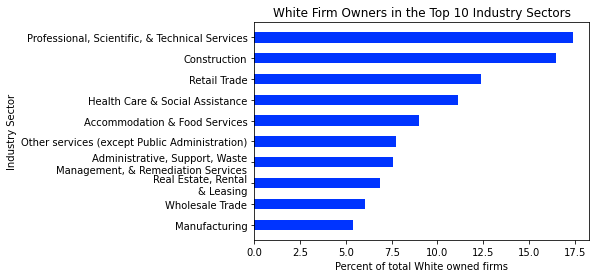

In [30]:
labels = ['Manufacturing','Wholesale Trade','Real Estate, Rental\n& Leasing','Administrative, Support, Waste\nManagement, & Remediation Services','Other services (except Public Administration)','Accommodation & Food Services','Health Care & Social Assistance','Retail Trade','Construction','Professional, Scientific, & Technical Services']

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots()
rects1 = ax.barh(x, gWhite['Perc_of_Total'], width,color='#0034FF')

ax.set_ylabel('Industry Sector')
ax.set_xlabel('Percent of total White owned firms')
ax.set_title('White Firm Owners in the Top 10 Industry Sectors')
ax.set_yticks(x, labels)

plt.show()

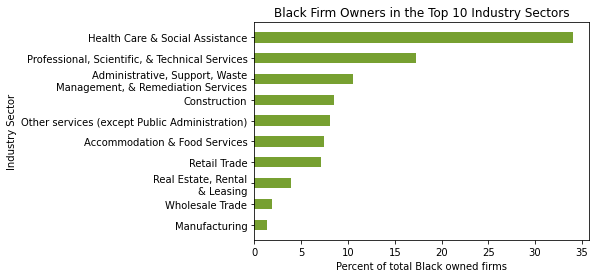

In [31]:
labels = ['Manufacturing','Wholesale Trade','Real Estate, Rental\n& Leasing','Retail Trade','Accommodation & Food Services','Other services (except Public Administration)','Construction','Administrative, Support, Waste\nManagement, & Remediation Services','Professional, Scientific, & Technical Services','Health Care & Social Assistance']

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots()
rects1 = ax.barh(x, gBlack['Perc_of_Total'], width,color='#77A031')

ax.set_ylabel('Industry Sector')
ax.set_xlabel('Percent of total Black owned firms')
ax.set_title('Black Firm Owners in the Top 10 Industry Sectors')
ax.set_yticks(x, labels)

plt.show()

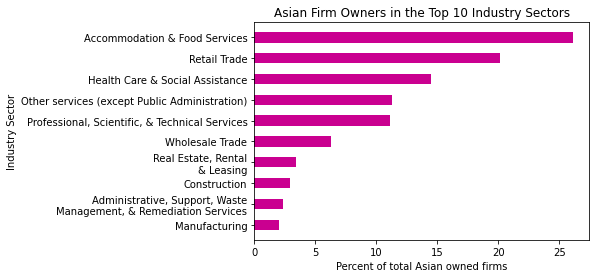

In [32]:
labels = ['Manufacturing','Administrative, Support, Waste\nManagement, & Remediation Services','Construction','Real Estate, Rental\n& Leasing','Wholesale Trade','Professional, Scientific, & Technical Services','Other services (except Public Administration)','Health Care & Social Assistance','Retail Trade','Accommodation & Food Services']

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots()
rects1 = ax.barh(x, gAsian['Perc_of_Total'], width,color='#CA0090')

ax.set_ylabel('Industry Sector')
ax.set_xlabel('Percent of total Asian owned firms')
ax.set_title('Asian Firm Owners in the Top 10 Industry Sectors')
ax.set_yticks(x, labels)

plt.show()

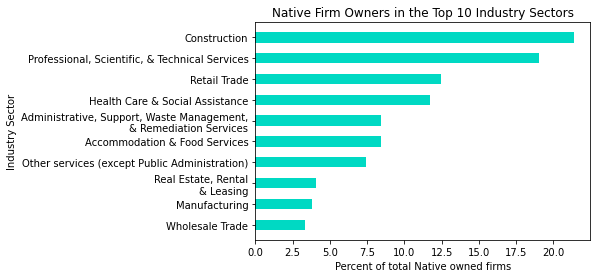

In [33]:
labels = ['Wholesale Trade','Manufacturing','Real Estate, Rental\n& Leasing','Other services (except Public Administration)','Accommodation & Food Services','Administrative, Support, Waste Management,\n& Remediation Services','Health Care & Social Assistance','Retail Trade','Professional, Scientific, & Technical Services','Construction']

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots()
rects1 = ax.barh(x, gNative['Perc_of_Total'], width,color='#00D9C3')

ax.set_ylabel('Industry Sector')
ax.set_xlabel('Percent of total Native owned firms')
ax.set_title('Native Firm Owners in the Top 10 Industry Sectors')
ax.set_yticks(x, labels)

plt.show()

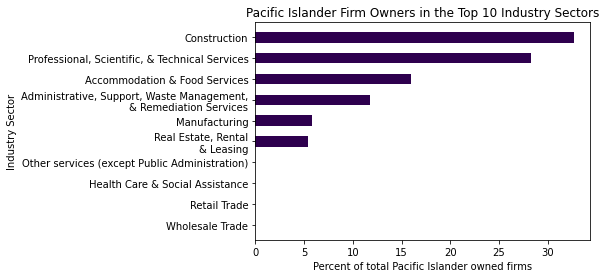

In [34]:
labels = ['Wholesale Trade','Retail Trade','Health Care & Social Assistance','Other services (except Public Administration)','Real Estate, Rental\n& Leasing','Manufacturing','Administrative, Support, Waste Management,\n& Remediation Services','Accommodation & Food Services','Professional, Scientific, & Technical Services','Construction']

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots()
rects1 = ax.barh(x, gPacific['Perc_of_Total'], width,color='#2E004E')

ax.set_ylabel('Industry Sector')
ax.set_xlabel('Percent of total Pacific Islander owned firms')
ax.set_title('Pacific Islander Firm Owners in the Top 10 Industry Sectors')
ax.set_yticks(x, labels)

plt.show()

### Business Owners Education
Looking at degrees of business owners

In [35]:
# restricting categories to select a single slice
degrees_of_owners = business_owner_characteristics[
    (business_owner_characteristics['OwnerSex'] == 'All owners of respondent firms') & 
    (business_owner_characteristics['IndustrySector'] == 'Total for all sectors') &
    (business_owner_characteristics['OwnerRace'] == 'All owners of respondent firms') &
    (business_owner_characteristics['OwnerEthnicity'] == 'All owners of respondent firms') & 
    (business_owner_characteristics['VeteranStatus'] == 'All owners of respondent firms') &
    (business_owner_characteristics['QuestionDescription'] == 'FLDEDUC')
    ]

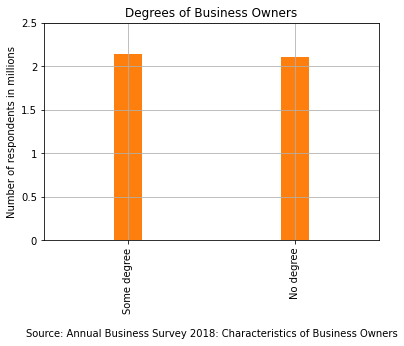

In [36]:
# selecting row for all degree holders and non-degree holders using indexes
degrees_plot_table = degrees_of_owners.loc[[1287, 1289]]

# plotting
degrees_plot = degrees_plot_table.plot(
    title = "Degrees of Business Owners",
    kind = "bar",
    legend = False,
    grid = True
)

# setting tick labels and values
degrees_plot.set_xticklabels(['Some degree', 'No degree'])
degrees_plot.set_yticks([0e6, 0.5e6, 1e6, 1.5e6, 2e6, 2.5e6])
degrees_plot.set_yticklabels([0, 0.5, 1, 1.5, 2, 2.5])

# labeling x and y axes
degrees_plot.set_xlabel('\nSource: Annual Business Survey 2018: Characteristics of Business Owners')
degrees_plot.set_ylabel('Number of respondents in millions')

plt.show()

Text(0, 0.5, 'Percentage of business owners with degrees')

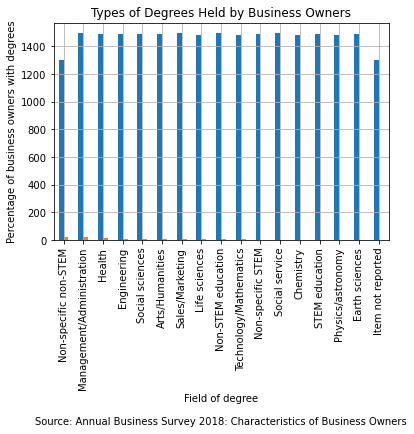

In [37]:
# plot of degrees held by degree-holding owners (% of total)

# dropping rows for 'all degree holders' and 'non-degree holders' using indexes
# dropping column for absolute number of holders
# sorting value by percentage of holders
degree_kind_table = degrees_of_owners.drop([1287, 1289]).drop(['NumberOfOwners'], axis = 1).sort_values('PercentageOfOwners', ascending = False)

# plotting
degree_kind_plot = degree_kind_table.plot(
    title = "Types of Degrees Held by Business Owners",
    kind = "bar",
    legend = False,
    grid = True
)

# cleaning and shortening x tick labels
degree_kind_plot.set_xticklabels([
    'Non-specific non-STEM',
    'Management/Administration',
    'Health',
    'Engineering',
    'Social sciences',
    'Arts/Humanities',
    'Sales/Marketing',
    'Life sciences',
    'Non-STEM education',
    'Technology/Mathematics',
    'Non-specific STEM',
    'Social service',
    'Chemistry',
    'STEM education',
    'Physics/astronomy',
    'Earth sciences',
    'Item not reported'
    ])

# labeling x and y axes
degree_kind_plot.set_xlabel('Field of degree\n\nSource: Annual Business Survey 2018: Characteristics of Business Owners')
degree_kind_plot.set_ylabel('Percentage of business owners with degrees')


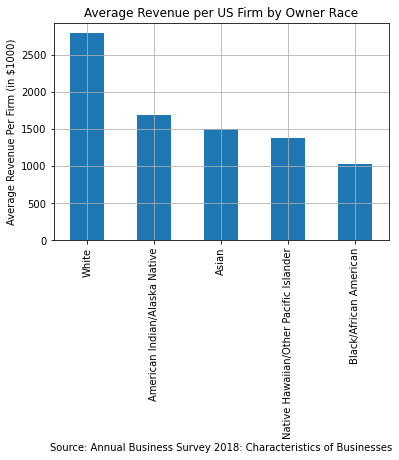

In [38]:
# plot of average revenue per firm according to owner race

# restricting categories to select a single slice
revenue_race = business_characteristics[
    (business_characteristics['SurveyQuestionChoice'] == 'All firms') & 
    (business_characteristics['QuestionDescription'] == 'OWNRNUM') &
    (business_characteristics['Sex'] == 'Total') &
    (business_characteristics['Ethnicity'] == 'Total') &
    (business_characteristics['VeteranStatus'] == 'Total') &
    (business_characteristics['IndustrySector'] == 'Total for all sectors')
    ]

# selecting relevant columns for plotting
revenue_race = revenue_race[['Race', 'NumberOfRespondents', 'RevenueOfAllFirmsInCategory']]

# revenue_race = revenue_race.astype({'NumberOfRespondents':'int64', 'RevenueOfAllFirmsInCategory':'int64'})

# calculating average revenue per firm
revenue_race['AverageRevenue'] = (revenue_race['RevenueOfAllFirmsInCategory']/revenue_race['NumberOfRespondents'])

# excluding aggregated races ('minority', 'nonminority', 'total)
labels_to_include = ['White', 'Black or African American', 'American Indian and Alaska Native', 'Asian', 'Native Hawaiian and Other Pacific Islander']

# drop columns after calculation
# sort by descending averages
revenue_race = revenue_race[revenue_race['Race'].isin(labels_to_include)].drop(['NumberOfRespondents', 'RevenueOfAllFirmsInCategory'], axis = 1).sort_values(by = 'AverageRevenue', ascending = False)

# plotting
revenue_race_plot = revenue_race.plot(
    title = 'Average Revenue per US Firm by Owner Race',
    legend = False,
    kind = 'bar',
    grid = True
)

# cleaning and shortening x tick labels
revenue_race_plot.set_xticklabels([
    'White',
    'American Indian/Alaska Native',
    'Asian',
    'Native Hawaiian/Other Pacific Islander',
    'Black/African American'
])

# labeling x and y axes
revenue_race_plot.set_xlabel('Source: Annual Business Survey 2018: Characteristics of Businesses')
revenue_race_plot.set_ylabel('Average Revenue Per Firm (in $1000)')

plt.show()